# Machine Learning-ASSIGNMENT 2

BITS ID: 2025AA05265

Name: JONNALAGADDA JAYAKRISHNA

Email: 2025aa05265@wilp.bits-pilani.ac.in

Date: 05/02/2026

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
feature_names = data.feature_names
df = pd.concat([X, y], axis=1)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dataset Shape and Basic Info

In [3]:
dataset_name = "Breast Cancer Wisconsin Dataset"
dataset_source = "UCI / sklearn.datasets"
n_samples = df.shape[0]
n_features = X.shape[1]
problem_type = "Binary Classification"
primary_metric = "F1-score"

print("DATASET INFORMATION")
print("Dataset name:", dataset_name)
print("Source:", dataset_source)
print("Total samples:", n_samples)
print("Total features:", n_features)
print("Problem type:", problem_type)
print("Primary metric:", primary_metric)


DATASET INFORMATION
Dataset name: Breast Cancer Wisconsin Dataset
Source: UCI / sklearn.datasets
Total samples: 569
Total features: 30
Problem type: Binary Classification
Primary metric: F1-score


EDA ANALYSIS

In [4]:
print("\nClass distribution:")
print(df["target"].value_counts())



Class distribution:
target
1    357
0    212
Name: count, dtype: int64


target
1    357
0    212
Name: count, dtype: int64


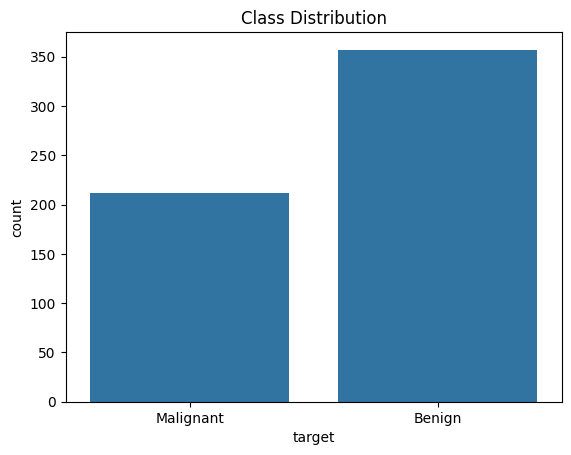

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

print(df["target"].value_counts())

sns.countplot(x="target", data=df)
plt.xticks([0,1], ["Malignant", "Benign"])
plt.title("Class Distribution")
plt.show()


In [6]:
print("\nMissing values per column:")
print(df.isnull().sum().sum())
df.describe()



Missing values per column:
0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


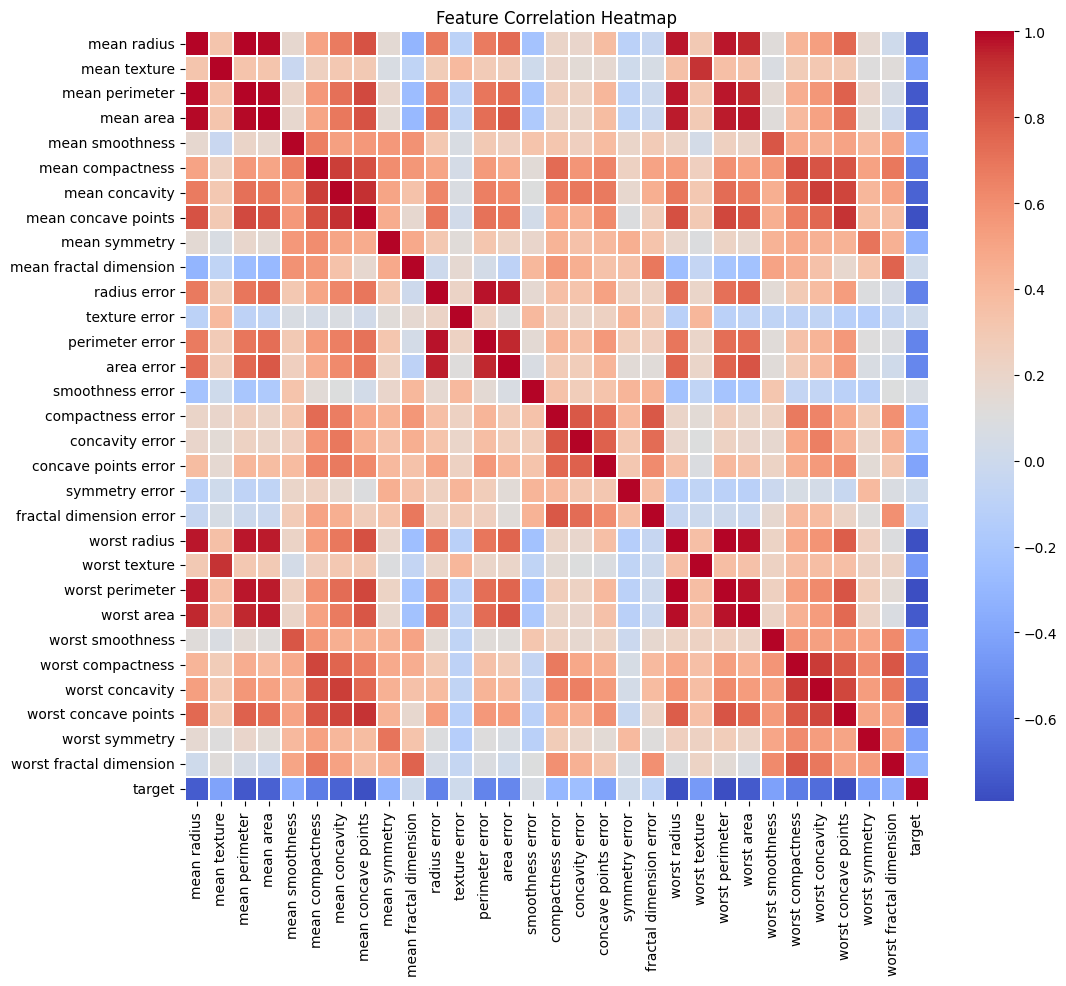

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.show()


TRAIN–TEST SPLIT (80/20)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# After train_test_split
df_test = pd.concat([X_test, y_test], axis=1)

# Save test file
df_test.to_csv("breast_cancer_test.csv", index=False)

df_test.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050,0
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083,1
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830,0
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469,1
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115,0


Feature Scaling

In [11]:
import joblib
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)
joblib.dump(scaler, "scaler.pkl")

(455, 30) (114, 30)


['scaler.pkl']

DEFINE MODELS

In [12]:
from xgboost import XGBClassifier

trained_models = {}

trained_models["Logistic Regression"] = LogisticRegression(max_iter=1000)
trained_models["Decision Tree"] = DecisionTreeClassifier(random_state=42)
trained_models["KNN"] = KNeighborsClassifier(n_neighbors=5)
trained_models["Naive Bayes"] = GaussianNB()
trained_models["Random Forest"] = RandomForestClassifier(n_estimators=100, random_state=42)
trained_models["XGBoost"] = XGBClassifier(
    eval_metric="logloss",
    #use_label_encoder=False,
    random_state=42
)

for name, model in trained_models.items():
    model.fit(X_train_scaled, y_train)

In [13]:
print("Models stored:", list(trained_models.keys()))


Models stored: ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest', 'XGBoost']


TRAIN + EVALUATE ALL MODELS

In [14]:
results = []

for name, model in trained_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    results.append(metrics)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


COMPARISON TABLE

In [15]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.964912,0.996032,0.972222,0.972222,0.972222,0.924603
1,Decision Tree,0.912281,0.915675,0.955882,0.902778,0.928571,0.817412
2,KNN,0.912281,0.955853,0.942857,0.916667,0.929577,0.813927
3,Naive Bayes,0.938596,0.987765,0.945205,0.958333,0.951724,0.867553
4,Random Forest,0.956140,0.993717,0.958904,0.972222,0.965517,0.905447
5,XGBoost,0.956140,0.990079,0.946667,0.986111,0.965986,0.905824


In [16]:
import pandas as pd

# Create observation table for all models
observations_df = pd.DataFrame({
    "ML Model Name": [
        "Logistic Regression",
        "Decision Tree",
        "kNN",
        "Naive Bayes",
        "Random Forest (Ensemble)",
        "XGBoost (Ensemble)"
    ],
    "Observation about model performance": [
        "Achieved the highest accuracy, F1-score, and MCC among all models. It showed excellent class separation, stable performance, and fast convergence, making it a strong baseline for the dataset.",

        "Showed lower accuracy compared to other models due to overfitting on training data. Performance dropped on test data, indicating sensitivity to data variations and depth settings.",

        "Performed well with high recall and F1-score by capturing local data patterns. However, performance depends strongly on feature scaling and choice of k value.",

        "Delivered balanced performance with good recall and precision. Assumption of feature independence limits its ability to model complex relationships, but it remains computationally efficient.",

        "Improved performance over a single decision tree by reducing overfitting through ensemble learning. Provided strong accuracy and robustness at moderate computational cost.",

        "Achieved excellent AUC and F1-score by effectively learning complex feature interactions. As a boosting-based ensemble, it provided high predictive power but required more training time."
    ]
})

print("MODEL PERFORMANCE OBSERVATIONS")
observations_df


MODEL PERFORMANCE OBSERVATIONS


,ML Model Name,Observation about model performance
0,Logistic Regression,"Achieved the highest accuracy, F1-score, and M..."
1,Decision Tree,Showed lower accuracy compared to other models...
2,kNN,Performed well with high recall and F1-score b...
3,Naive Bayes,Delivered balanced performance with good recal...
4,Random Forest (Ensemble),Improved performance over a single decision tr...
5,XGBoost (Ensemble),Achieved excellent AUC and F1-score by effecti...


CONFUSION MATRIX (FOR ALL MODELS)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


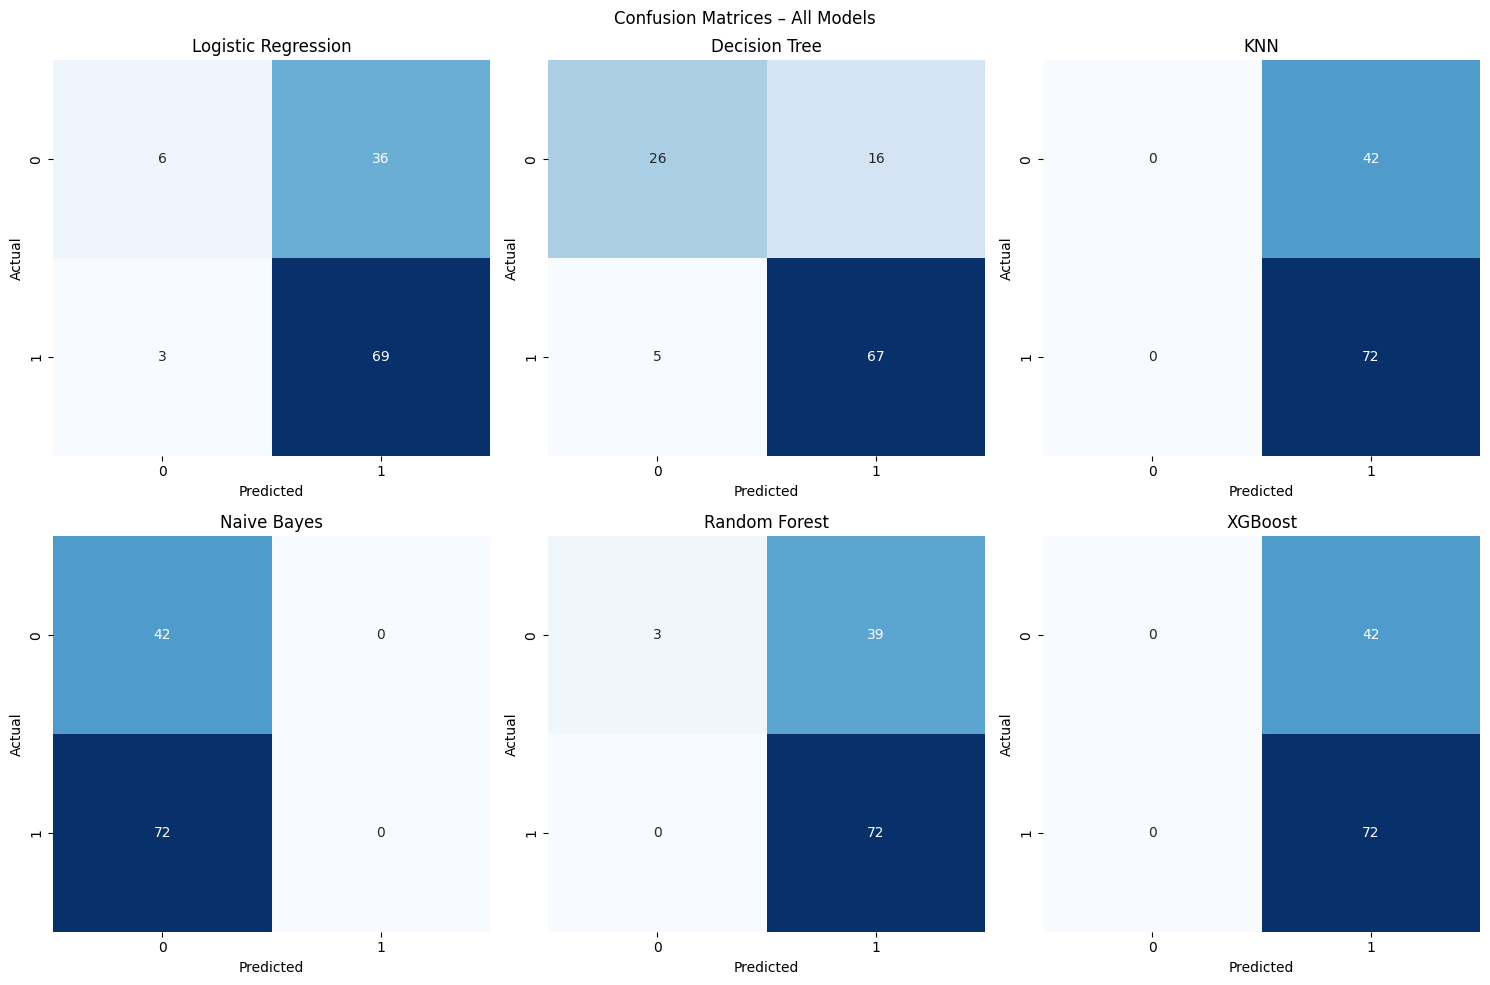

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()

for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                cbar=False, ax=axes[i])

    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Confusion Matrices – All Models")
plt.tight_layout()
plt.show()


In [18]:
import joblib
import os

os.makedirs("models", exist_ok=True)


In [19]:
import joblib
import os

# Create folder for saved models
os.makedirs("models", exist_ok=True)

# Save all trained models
for name, model in trained_models.items():
    filename = name.lower().replace(" ", "_") + ".pkl"
    joblib.dump(model, f"models/{filename}")

print("All models saved successfully.")


All models saved successfully.


In [20]:
import shutil
from google.colab import files

# Zip the models folder
shutil.make_archive("models", "zip", "models")

# Download the zip file
files.download("models.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from google.colab import files

files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from google.colab import files
files.download("breast_cancer_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>